# Sklearn Discrete MeanMaxNorm

In [1]:
import pandas as pd
decimalDf = pd.read_csv('../decimal_minmaxnorm_dataset.csv')

In [2]:
X = decimalDf[['WHITE',
            'BLACK_OR_AFRICAN_AMERICAN',
            'AMERICAN_INDIAN_AND_ALASKA_NATIVE',
            'ASIAN',
            'NATIVE_HAWAIIAN_AND_OTHER_PACIFIC_ISLANDER',
            'HISPANIC_OR_LATINO'
            ]]
y = decimalDf['GrowthRate']

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
import time

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)
models = {}
rmseValues = {}
trainingTimes = {}
predictionTimes = {}

In [4]:
def processModel(model, modelKey):
    # Train Model
    print('----- ----- -----')
    print('Training model', modelKey)
    trainingStartTime = time.time()
    trainedModel = model.fit(X_train, y_train)
    trainingTime = time.time() - trainingStartTime
    print('Finished training in ' + str(trainingTime) + 's')

    # Predict
    print('Predicting on model', modelKey)
    predictionStartTime = time.time()
    modelPredictions = trainedModel.predict(X_test)
    predictionTime = time.time() - predictionStartTime
    print('Finished predictions in ' + str(predictionTime) + 's')

    # Get Accuracy
    print('Getting RMSE on model', modelKey)
    rmse = root_mean_squared_error(y_test, modelPredictions)

    # Finished
    print()
    print('Finished processing model', modelKey)
    print('RMSE: ' + str(rmse))
    print('Training time: ' + str(trainingTime) + 's')
    print('Prediction time: ' + str(predictionTime) + 's')
    print('----- ----- -----')

    return (rmse, trainingTime, predictionTime)

In [5]:
# Set Model Properties
model = 'Linear Regression'
from sklearn.linear_model import LinearRegression
models[model] = LinearRegression()
rmseValues[model], trainingTimes[model], predictionTimes[model] = processModel(models[model], model)

----- ----- -----
Training model Linear Regression
Finished training in 0.03513598442077637s
Predicting on model Linear Regression
Finished predictions in 0.002259969711303711s
Getting RMSE on model Linear Regression

Finished processing model Linear Regression
RMSE: 0.022881842900936138
Training time: 0.03513598442077637s
Prediction time: 0.002259969711303711s
----- ----- -----


In [6]:
# Set Model Properties
model = 'Ridge Regression'
from sklearn.linear_model import Ridge
models[model] = Ridge()
rmseValues[model], trainingTimes[model], predictionTimes[model] = processModel(models[model], model)

----- ----- -----
Training model Ridge Regression
Finished training in 0.013705968856811523s
Predicting on model Ridge Regression
Finished predictions in 0.0022211074829101562s
Getting RMSE on model Ridge Regression

Finished processing model Ridge Regression
RMSE: 0.02288129782806974
Training time: 0.013705968856811523s
Prediction time: 0.0022211074829101562s
----- ----- -----


In [7]:
# Set Model Properties
model = 'Ridge Cross Validation Regression'
from sklearn.linear_model import RidgeCV
models[model] = RidgeCV()
rmseValues[model], trainingTimes[model], predictionTimes[model] = processModel(models[model], model)

----- ----- -----
Training model Ridge Cross Validation Regression
Finished training in 0.09563231468200684s
Predicting on model Ridge Cross Validation Regression
Finished predictions in 0.0020759105682373047s
Getting RMSE on model Ridge Cross Validation Regression

Finished processing model Ridge Cross Validation Regression
RMSE: 0.022880803189170625
Training time: 0.09563231468200684s
Prediction time: 0.0020759105682373047s
----- ----- -----


In [8]:
# Set Model Properties
model = 'Huber Regression (Outlier Robust)'
from sklearn.linear_model import HuberRegressor
models[model] = HuberRegressor()
rmseValues[model], trainingTimes[model], predictionTimes[model] = processModel(models[model], model)

----- ----- -----
Training model Huber Regression (Outlier Robust)
Finished training in 1.349682092666626s
Predicting on model Huber Regression (Outlier Robust)
Finished predictions in 0.0015938282012939453s
Getting RMSE on model Huber Regression (Outlier Robust)

Finished processing model Huber Regression (Outlier Robust)
RMSE: 0.022921626446803102
Training time: 1.349682092666626s
Prediction time: 0.0015938282012939453s
----- ----- -----


In [9]:
# Set Model Properties
model = 'Decision Tree Regression'
from sklearn.tree import DecisionTreeRegressor
models[model] = DecisionTreeRegressor()
rmseValues[model], trainingTimes[model], predictionTimes[model] = processModel(models[model], model)

----- ----- -----
Training model Decision Tree Regression
Finished training in 1.853714942932129s
Predicting on model Decision Tree Regression
Finished predictions in 0.04100394248962402s
Getting RMSE on model Decision Tree Regression

Finished processing model Decision Tree Regression
RMSE: 0.03198303655982482
Training time: 1.853714942932129s
Prediction time: 0.04100394248962402s
----- ----- -----


In [10]:
resultsDf = pd.DataFrame(index=models.keys(), columns=['RMSE', 'TrainingTime', 'PredictionTime'])
resultsDf['RMSE'] = rmseValues.values()
resultsDf['TrainingTime'] = trainingTimes.values()
resultsDf['PredictionTime'] = predictionTimes.values()
resultsDf = resultsDf.sort_values(by='RMSE', ascending=True)

resultsDf

,RMSE,TrainingTime,PredictionTime
Ridge Cross Validation Regression,0.022881,0.095632,0.002076
Ridge Regression,0.022881,0.013706,0.002221
Linear Regression,0.022882,0.035136,0.002260
Huber Regression (Outlier Robust),0.022922,1.349682,0.001594
Decision Tree Regression,0.031983,1.853715,0.041004


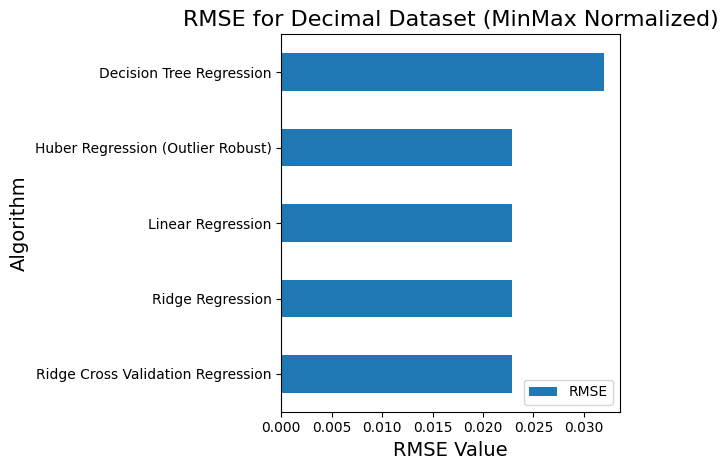

In [16]:
import matplotlib.pyplot as plt
toPlot = resultsDf.drop(['TrainingTime', 'PredictionTime'], axis=1)
ax = toPlot.plot.barh()
plt.title('RMSE for Decimal Dataset (MinMax Normalized)', fontsize=16)
plt.xlabel('RMSE Value', fontsize=14)
plt.ylabel('Algorithm', fontsize=14)
plt.tight_layout()